In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/results.csv')
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [5]:
morco_malaw = data[((data['home_team'] == 'Morocco') & (data['away_team'] == 'Malawi')) | (data['home_team'] == 'Malawi') & (data['away_team'] == 'Morocco')]

In [6]:
morco_malaw

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
13750,1985-04-07,Morocco,Malawi,2.0,0.0,FIFA World Cup qualification,Rabat,Morocco,False
13788,1985-04-21,Malawi,Morocco,0.0,0.0,FIFA World Cup qualification,Blantyre,Malawi,False
17682,1993-04-11,Morocco,Malawi,0.0,1.0,African Cup of Nations qualification,Rabat,Morocco,False
18035,1993-07-25,Malawi,Morocco,0.0,2.0,African Cup of Nations qualification,Lilongwe,Malawi,False
26710,2004-06-05,Malawi,Morocco,1.0,1.0,FIFA World Cup qualification,Blantyre,Malawi,False
27651,2005-06-04,Morocco,Malawi,4.0,1.0,FIFA World Cup qualification,Rabat,Morocco,False
29391,2007-06-16,Malawi,Morocco,0.0,1.0,African Cup of Nations qualification,Blantyre,Malawi,False


In [7]:
len(morco_malaw)

7

In [8]:
def get_results(competition, country_A, country_B):
    win_A = 0 # country A win
    draw = 0 # draw of country_A and country_B are equal
    #lost_A = 0 # country A lost
    for i, j, k, l in zip(competition['home_team'], competition['away_team'], competition['home_score'], competition['away_score']):
        if ((i == country_A and k > l) or (j == country_A and k < l)):
            win_A += 1
        elif ((i == country_A and k == l) or (j == country_A and k == l)):
            draw += 1
    return [win_A, draw, len(competition)-(win_A + draw)]

In [12]:
get_results(morco_malaw, 'Morocco','Malawi')

[4, 2, 1]

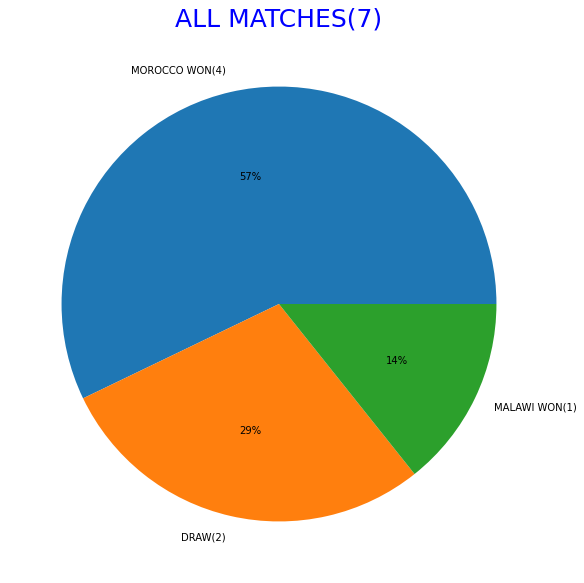

In [17]:
labels1 = ['MOROCCO WON(4)', 'DRAW(2)', 'MALAWI WON(1)']
sizes1 = get_results(morco_malaw, 'Morocco', 'Malawi')

fig, ax1 = plt.subplots( figsize=(10, 10))

ax1.pie(sizes1, labels=labels1, autopct='%.0f%%')



ax1.set_title('ALL MATCHES(7)', fontsize=25, color='b')

#plt.show()
plt.savefig("images/morocco_malawi.png")